In [174]:
import numpy as np
import scipy.integrate as sci
import time
import matplotlib.pyplot as plt

In [175]:
def f(t, y, mu): # RHS of Van der Pol oscillator ODE
    dy = np.zeros((2,))
    dy[0] = y[1]
    dy[1] = mu*(1 - y[0]**2)*y[1] - y[0]
    return dy


# parameters
y0 = [2,0]
tmax = 1000.0
sols = []
mu_list = [1e1, 1e2, 1e3]
eps_list = [1e-6, 1e-9, 1e-12]
method_list = ["RK45", "LSODA"]

for method in method_list:
    for mu in mu_list:
        for eps in eps_list:
            
            # dictionary with method name, stiffness, tolerance
            sol_entry = {
                "method": method,
                "mu": mu,
                "eps": eps
            }  
            
            # solve by RK45/LSODA
            start_time = time.time()
            sol = sci.solve_ivp(f, [0,tmax], y0, method = method, args = (mu,), rtol = eps, atol = eps)
            tcpu = time.time() - start_time
            sol_entry["tcpu"] = tcpu
            sol_entry["sol"] = sol.y
            sols.append(sol_entry)
            print("\nmethod:", method, "mu:", mu, "eps:", eps, "tcpu:", tcpu)
print("\nDONE")


method: RK45 mu: 10.0 eps: 1e-06 tcpu: 0.9479913711547852

method: RK45 mu: 10.0 eps: 1e-09 tcpu: 3.345341920852661

method: RK45 mu: 10.0 eps: 1e-12 tcpu: 12.307925939559937

method: RK45 mu: 100.0 eps: 1e-06 tcpu: 4.48489785194397

method: RK45 mu: 100.0 eps: 1e-09 tcpu: 4.920779466629028

method: RK45 mu: 100.0 eps: 1e-12 tcpu: 9.91553282737732

method: RK45 mu: 1000.0 eps: 1e-06 tcpu: 51.71986651420593

method: RK45 mu: 1000.0 eps: 1e-09 tcpu: 52.24018335342407

method: RK45 mu: 1000.0 eps: 1e-12 tcpu: 52.28616452217102

method: LSODA mu: 10.0 eps: 1e-06 tcpu: 0.37998223304748535

method: LSODA mu: 10.0 eps: 1e-09 tcpu: 0.8607168197631836

method: LSODA mu: 10.0 eps: 1e-12 tcpu: 1.3048558235168457

method: LSODA mu: 100.0 eps: 1e-06 tcpu: 0.05529141426086426

method: LSODA mu: 100.0 eps: 1e-09 tcpu: 0.11296534538269043

method: LSODA mu: 100.0 eps: 1e-12 tcpu: 0.2672858238220215

method: LSODA mu: 1000.0 eps: 1e-06 tcpu: 0.0069811344146728516

method: LSODA mu: 1000.0 eps: 1e-09 t

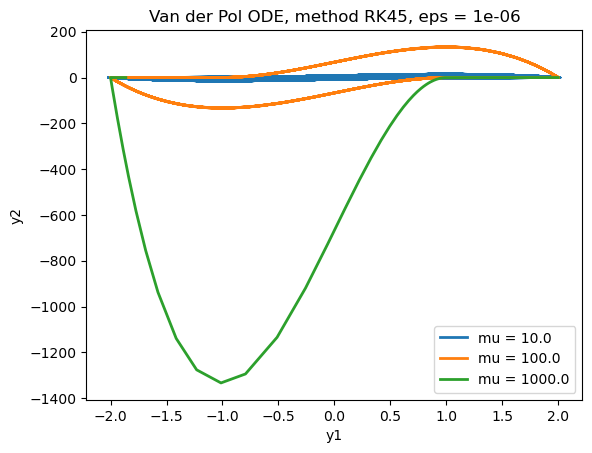

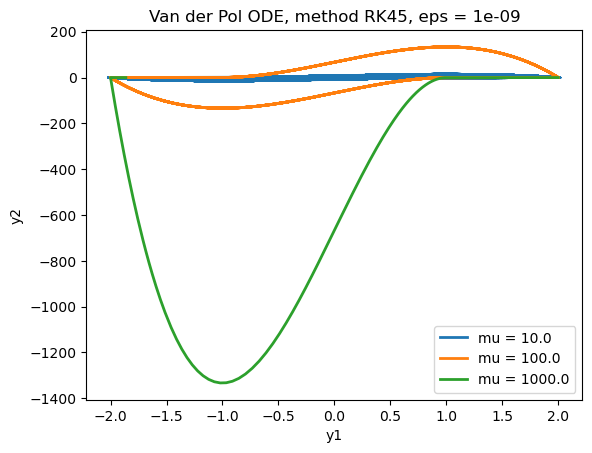

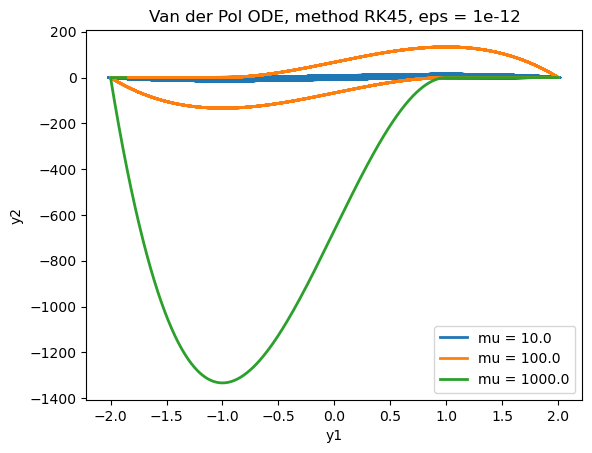

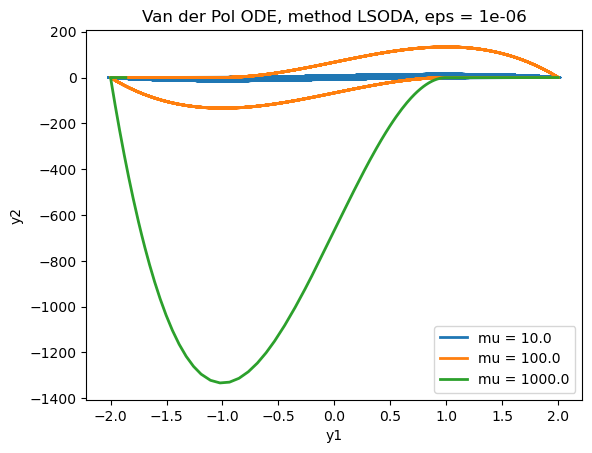

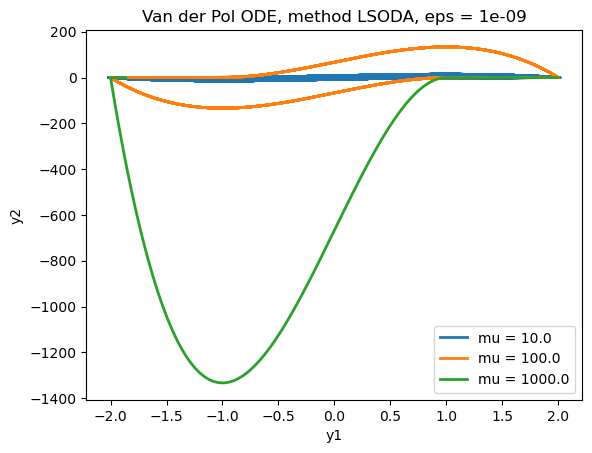

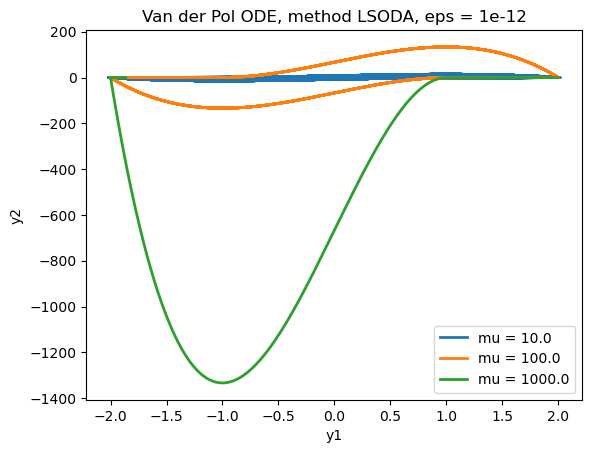

In [176]:
# plot sols with fixed method and eps, varying mu
for method in method_list:
    for eps in eps_list:
        sol_res = list(filter(lambda sol: sol["method"] == method and sol["eps"] == eps, sols))
        plt.rcParams.update({'font.size': 10})
        for sol in sol_res:
            plt.plot(sol["sol"][0], sol["sol"][1], linewidth=2, label="mu = "+str(sol["mu"])) 
        plt.title("Van der Pol ODE, method {}, eps = {}".format(method, eps))
        plt.legend()
        plt.xlabel("y1")
        plt.ylabel("y2")
        ax.set_aspect(1)
        plt.show()

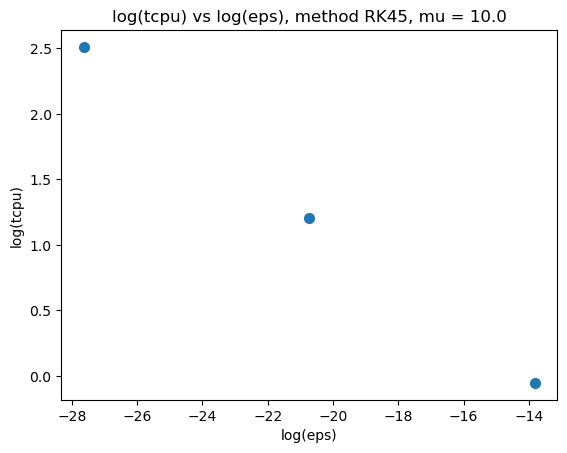

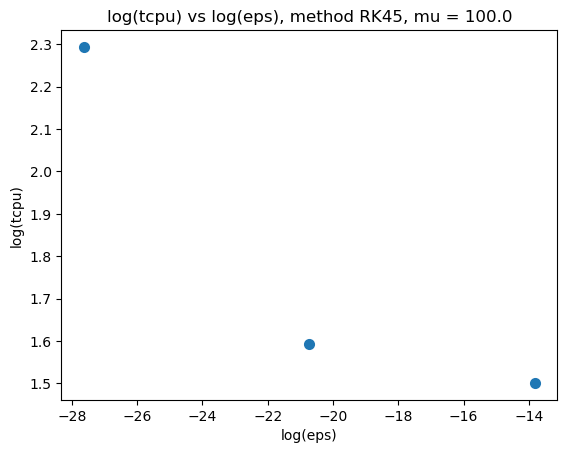

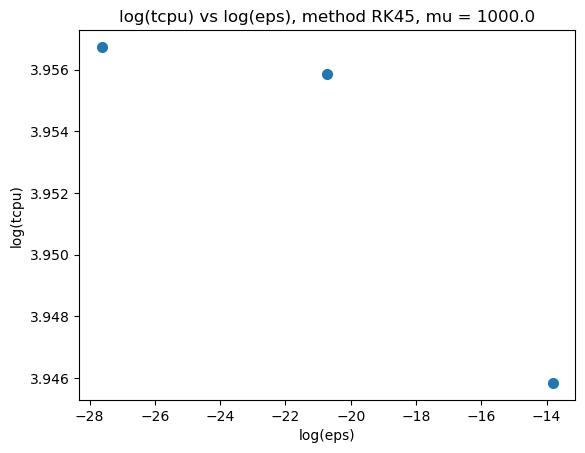

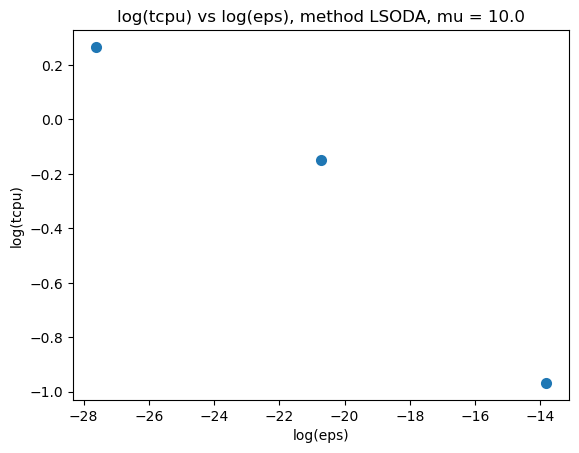

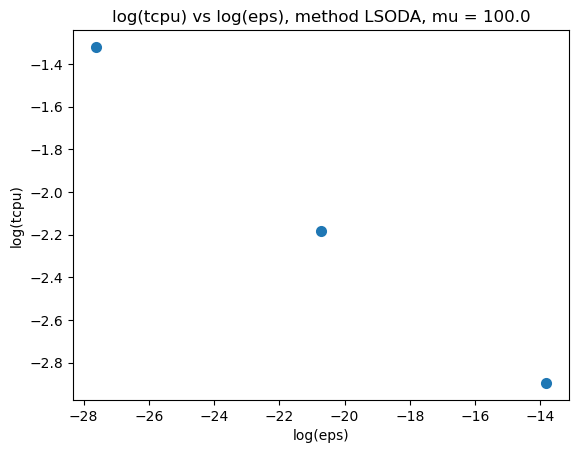

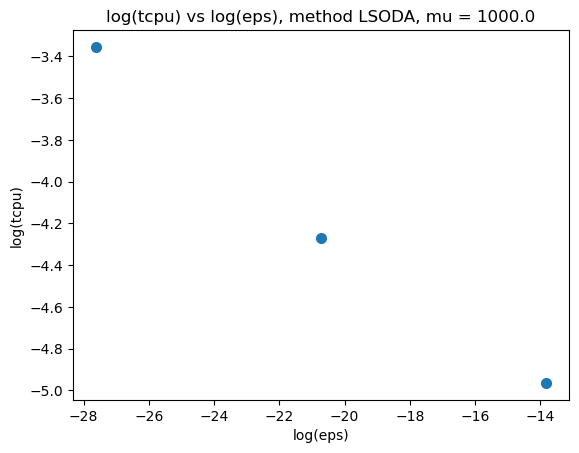

In [177]:
# for fixed method and mu, plot log(tcpu) vs log(eps)
for method in method_list:
    for mu in mu_list:
        sol_res = list(filter(lambda sol: sol["method"] == method and sol["mu"] == mu, sols))
        plt.rcParams.update({'font.size': 10})
        eps = [sol["eps"] for sol in sol_res]
        tcpu = [sol["tcpu"] for sol in sol_res]
        plt.scatter(np.log(eps), np.log(tcpu), linewidth=2) 
        plt.title("log(tcpu) vs log(eps), method {}, mu = {}".format(method, mu))
        plt.xlabel("log(eps)")
        plt.ylabel("log(tcpu)")
        ax.set_aspect(1)
        plt.show()